# Código para el dia 14 del 30DayMapChallenge
## @Jorge A. Zampieri
## Data: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S5P_OFFL_L3_NO2

In [82]:
import ee
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from shapely.geometry import MultiPolygon
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import time


In [2]:
# Inicializar Earth Engine
ee.Initialize()

*** Earth Engine *** Share your feedback by taking our Annual Developer Satisfaction Survey: https://google.qualtrics.com/jfe/form/SV_0JLhFqfSY1uiEaW?source=Init


In [4]:
# Cargar la colección de datos de NO2 y seleccionar el año 2023
collection = ee.ImageCollection('COPERNICUS/S5P/OFFL/L3_NO2') \
             .select('tropospheric_NO2_column_number_density') \
             .filterDate('2023-01-01', '2023-12-31')


In [5]:
# Calcular el promedio anual de NO2 para 2023
annual_mean = collection.mean()

In [10]:
# Cargar una capa de geometrías de países desde Earth Engine
countries = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017")

In [11]:
# Función para extraer valores promedio de NO2 por país
def get_country_NO2(feature):
    country_mean = annual_mean.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=feature.geometry(),
        scale=10000,
        maxPixels=1e9
    )
    return feature.set('NO2_mean', country_mean.get('tropospheric_NO2_column_number_density'))

In [12]:
# Aplicar la función a cada país
countries_NO2 = countries.map(get_country_NO2)

In [13]:
# Exportar los datos procesados a Google Drive como CSV
task = ee.batch.Export.table.toDrive(
    collection=countries_NO2,
    description='NO2_by_country_2023',
    fileFormat='CSV'
)
task.start()

In [16]:
# Verificar el estado de la tarea
while task.active():
    print('Esperando a que se complete la exportación...')
    time.sleep(10)

print('Exportación completada. Revisa Google Drive para el archivo CSV.')

Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exportación...
Esperando a que se complete la exp

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [18]:
# Cargar el archivo CSV exportado de Google Drive
df = pd.read_csv("C:/Users/VICTUS/OneDrive/LinkedIn/30DayChallenge - copia/Day14/NO2_by_country_2023.csv")

In [19]:
df.head()

,system:index,NO2_mean,abbreviati,country_co,country_na,wld_rgn,.geo
0,00000000000000000000,0.000014,NaN,CD,Chad,Africa,"{""type"":""Polygon"",""coordinates"":[[[15.79989695..."
1,00000000000000000014,0.000016,Mal.,MI,Malawi,Africa,"{""type"":""MultiPolygon"",""coordinates"":[[[[34.61..."
2,00000000000000000015,0.000021,Zam.,ZA,Zambia,Africa,"{""type"":""Polygon"",""coordinates"":[[[25.26174829..."
3,00000000000000000016,0.000016,Zimb.,ZI,Zimbabwe,Africa,"{""type"":""Polygon"",""coordinates"":[[[25.26291968..."
4,00000000000000000017,0.000015,Bots.,BC,Botswana,Africa,"{""type"":""Polygon"",""coordinates"":[[[19.99891705..."


In [51]:
df.NO2_mean.min()

-4.805794293523045e-07

In [52]:
df.NO2_mean.max()

0.000127037772514586

In [20]:
# Cargar una capa de países en GeoDataFrame
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_13540\736209537.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [22]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [23]:
# Unir el GeoDataFrame con los datos de NO2
world = world.merge(df, left_on='name', right_on='country_na', how='left')  # Ajustar "country_name_column"


In [24]:
# Filtrar países con datos válidos
world = world.dropna(subset=['NO2_mean'])

In [25]:
# Aplicar logaritmo a la columna de NO2 para mejor visualización
world['NO2_mean_log'] = np.log(world['NO2_mean'])

c:\Users\VICTUS\miniconda3\envs\gee\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


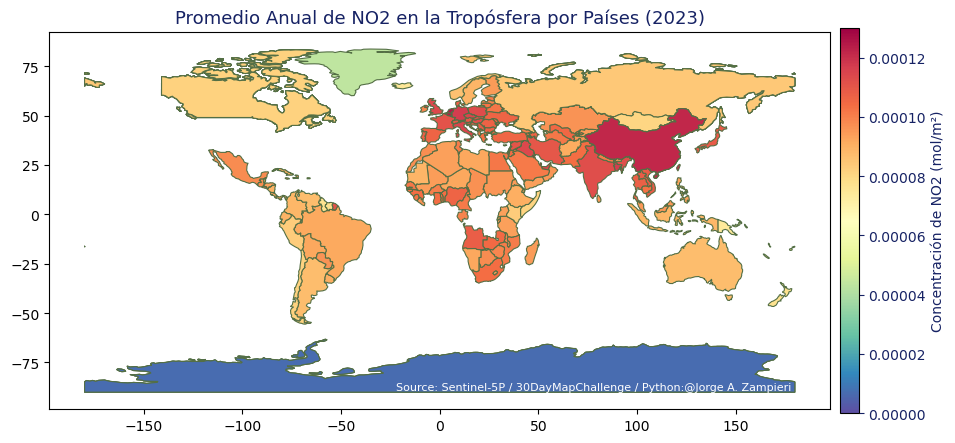

In [83]:
# Valores personalizados para los límites de la barra de colores
vmin = -4.8e-10  # Valor mínimo en notación científica
vmax = 1.3e-4  # Define el valor máximo deseado

# Configurar el mapa
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
cmap = plt.get_cmap('Spectral_r')
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Crear el mapa
world.plot(column='NO2_mean_log', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='#546f45')

# Agregar título y leyenda
ax.set_title('Promedio Anual de NO2 en la Tropósfera por Países (2023)', fontsize=13, color='#162264')
ax.text(0.95, 0.05, 'Source: Sentinel-5P / 30DayMapChallenge / Python:@Jorge A. Zampieri', fontsize=8, color='#ffffff', ha='right', transform=ax.transAxes)

# Añadir la barra de colores ajustada
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, location='right', shrink=0.5, pad=0.01)  # shrink para ajustar el tamaño
cbar.set_label('Concentración de NO2 (mol/m²)', fontsize=10, color='#162264')
cbar.ax.yaxis.set_tick_params(color='#162264')  # Color de los ticks de la barra
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#162264')  # Color de las etiquetas de la barra

#Guardamos la imagen
plt.savefig('Day14_AWorldMap.png', bbox_inches='tight', dpi=600)

# Mostrar el mapa
plt.show()
